In [172]:
# This exersise display segmentation of an image via KMean Clustering
# Segmentation is important technique to identify different element in an image. KMean is Divisive technique of clustering
import numpy as np
# Image Segmentation is the process of partitioning an
# image into multiple regions based on the characteristics of the pixels in the original image.
import cv2
import matplotlib.pyplot as plt

In [173]:
# Read image
image = cv2.imread("IronMan.jpeg")
image.shape

(1024, 768, 3)

In [188]:
# As opencv is having BGR (Blue Green Red) precidence hence we convert it to RBG
# The difference I observe is by default I see Blue is given preference hence image looks more blueish by default
img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img.shape

(1024, 768, 3)

In [189]:
# As K Mean require 2 Dimensional vector hence reshaping it to 2 D, with 3 features each row
vectorized = img.reshape((-1,3))
vectorized.shape

(786432, 3)

In [191]:
from sklearn.cluster import KMeans
vectorized = np.float32(vectorized)
kmean_image = KMeans(n_clusters=2, random_state = 0, n_init=5)
kmean_image.fit(vectorized)

KMeans(n_clusters=2, n_init=5, random_state=0)

Centroids
 [[191 183 155]
 [124  77  75]]
Labels identified
 [0 1 0 ... 1 1 1]
Labels flattened
 [0 1 0 ... 1 1 1]


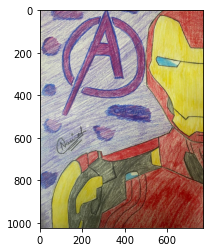

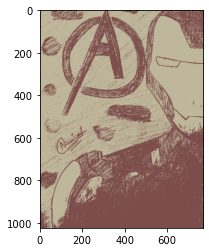

In [198]:
# Identify Center point out of Kmean model
c = np.uint8(kmean_image.cluster_centers_)
print("Centroids\n", c)
# You will notice the center will be same as of K value passed
print("Labels identified\n", kmean_image.labels_)
# I see no requirement of flattening as labels are already one D
print("Labels flattened\n",kmean_image.labels_.flatten())
# Segment data tells centroid of each point 
segment_data = c[kmean_image.labels_.flatten()]
segment_image = segment_data.reshape((img.shape))
plt.imshow(img)
plt.pause(1)
plt.imshow(segment_image)
plt.pause(1)

# The image is segmented in to two colors only, all pixeles are segmented